In [10]:
import json
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
def top_usuarios_por_evento(ruta_archivo, evento_objetivo, top_n=40):
    """
    Muestra los usuarios que más veces aparecen en un evento específico (e.g., 'play_video')
    y genera un gráfico de barras.
    
    :param ruta_archivo: Ruta del archivo JSONL que contiene los datos.
    :param evento_objetivo: Nombre del evento objetivo (e.g., 'play_video').
    :param top_n: Número de usuarios a mostrar en el ranking (por defecto 10).
    """
    conteo_usuarios = Counter()

    try:
        # Leer el archivo JSONL
        with open(ruta_archivo, 'r', encoding='utf-8') as archivo:
            for linea in archivo:
                if linea.strip():  # Ignorar líneas vacías
                    try:
                        objeto = json.loads(linea.strip())  # Cargar cada línea como JSON
                        evento = objeto.get('event_type', '')  # Obtener el tipo de evento
                        usuario = objeto.get('username', '')  # Obtener el nombre del usuario
                        
                        if evento == evento_objetivo and usuario:  # Verificar coincidencia y usuario válido
                            conteo_usuarios[usuario] += 1
                    except json.JSONDecodeError as e:
                        print(f"Error al decodificar línea: {e}")
        
        # Obtener los usuarios más frecuentes
        top_usuarios = conteo_usuarios.most_common(top_n)

        # Mostrar resultados en texto
        print(f"Top {top_n} usuarios con más eventos '{evento_objetivo}':\n")
        for i, (usuario, conteo) in enumerate(top_usuarios, start=1):
            print(f"{i}. {usuario}: {conteo} veces")

        # Generar gráfico de barras
        if top_usuarios:
            usuarios, conteos = zip(*top_usuarios)
            plt.figure(figsize=(10, 6))
            plt.bar(usuarios, conteos, color='skyblue')
            plt.xlabel('Usuarios')
            plt.ylabel('Cantidad de eventos')
            plt.title(f'Top {top_n} usuarios con más eventos "{evento_objetivo}"')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        
    except Exception as e:
        print(f"Error general: {e}")


Top 40 usuarios con más eventos 'play_video':

1. JeanpierreC: 437 veces
2. mlcambar: 405 veces
3. Majo2003-: 281 veces
4. betsy17: 115 veces
5. Ruth_Caroa: 115 veces
6. JanethUrrego: 110 veces
7. JoffreTandazo: 80 veces
8. Rodi: 76 veces
9. k_acuna90: 74 veces
10. Erika03_: 60 veces
11. GenesisGuerrero15: 52 veces
12. LuisFlores: 39 veces
13. geomaramacias: 36 veces
14. Ulises31: 36 veces
15. OmarSalazar: 35 veces
16. Sandra-gre2024: 32 veces
17. Miryan_P30: 30 veces
18. mendara: 24 veces
19. CatalinaMite: 23 veces
20. WilsonAzogue: 22 veces
21. DCastro: 21 veces
22. AdrianaFlores: 20 veces
23. ArianaMolina: 20 veces
24. WilliamGuevara: 19 veces
25. MishelAmaya: 17 veces
26. EvelynCM: 15 veces
27. CarolinaZh: 12 veces
28. DennysErazoQ: 11 veces
29. Neycer: 10 veces
30. JohanaJimenez: 9 veces
31. Washington-Ronquillo: 9 veces
32. Valquiria_cevallos: 8 veces
33. CatyRosillo: 8 veces
34. jorgechasi15: 8 veces
35. Nypincayag: 8 veces
36. Lucychavez-: 7 veces
37. Jonathan_Chalco: 7 veces
3

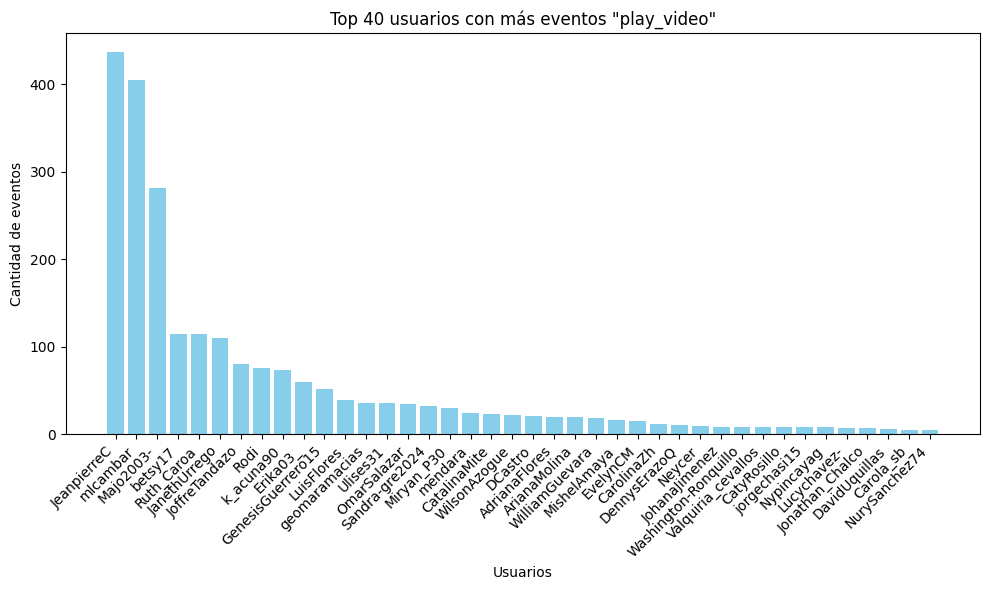

In [12]:
ruta_archivo_json = "C:\\Users\\nahom\\OneDrive - Universidad Técnica Particular de Loja - UTPL\\Curso Documentos Accesibles\\CSV\\analisis-codigo\\analizar_datos_open_campus\\Open Campus\\json\\docs\\jsonl\\play_video.jsonl"
top_usuarios_por_evento(ruta_archivo_json, 'play_video')

In [13]:
def mostrar_grafico(top_estudiantes, columna, titulo):
    usuarios = top_estudiantes['username']
    calificaciones = top_estudiantes[columna]

    plt.figure(figsize=(10, 6))
    plt.bar(usuarios, calificaciones, color='lightgreen')
    plt.xlabel('Estudiantes')
    plt.ylabel('Calificación')
    plt.title(f'Top 10 estudiantes - {columna} ({titulo})')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [14]:
def top_estudiantes_por_evaluacion(ruta_archivo):
    columnas_evaluaciones = ['EvalSemanal 01', 'EvalSemanal 02', 'EvalSemanal 03', 'EvalSemanal 04', 'EvalSemanal Avg']
    df = pd.read_csv(ruta_archivo, usecols=['username'] + columnas_evaluaciones)

    for columna in columnas_evaluaciones:
        top_estudiantes = df.nlargest(40, columna)[['username', columna]]
        mostrar_grafico(top_estudiantes, columna, "Evaluaciones Semanales")

In [15]:
def top_estudiantes_por_autoevaluacion(ruta_archivo):
    columnas_autoevaluaciones = ['FormAutoevaluacion 01', 'FormAutoevaluacion 02', 'FormAutoevaluacion 03', 'FormAutoevaluacion 04', 'FormAutoevaluacion Avg']
    df = pd.read_csv(ruta_archivo, usecols=['username'] + columnas_autoevaluaciones)

    for columna in columnas_autoevaluaciones:
        top_estudiantes = df.nlargest(40, columna)[['username', columna]]
        mostrar_grafico(top_estudiantes, columna, "Autoevaluaciones")

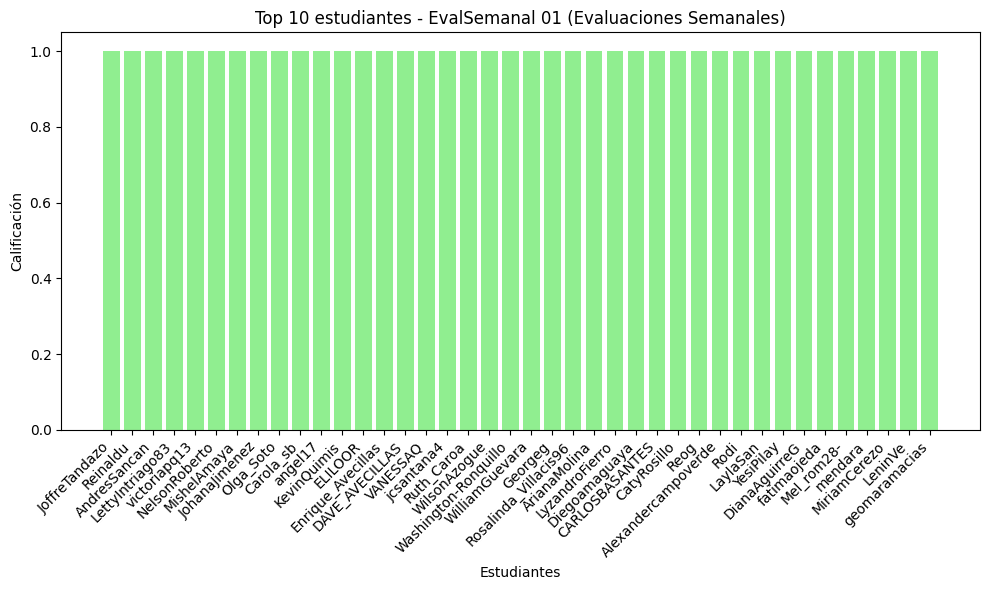

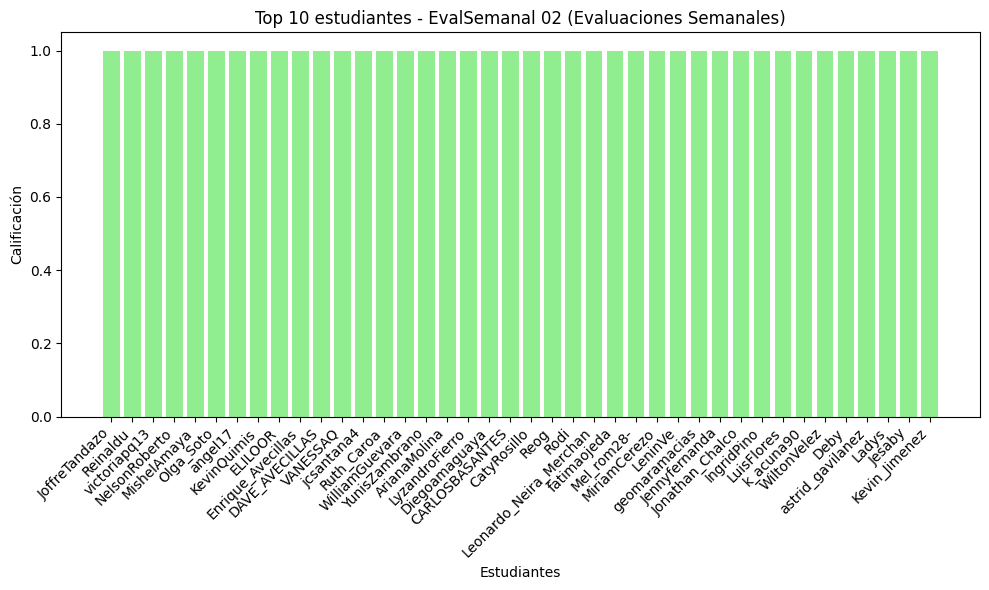

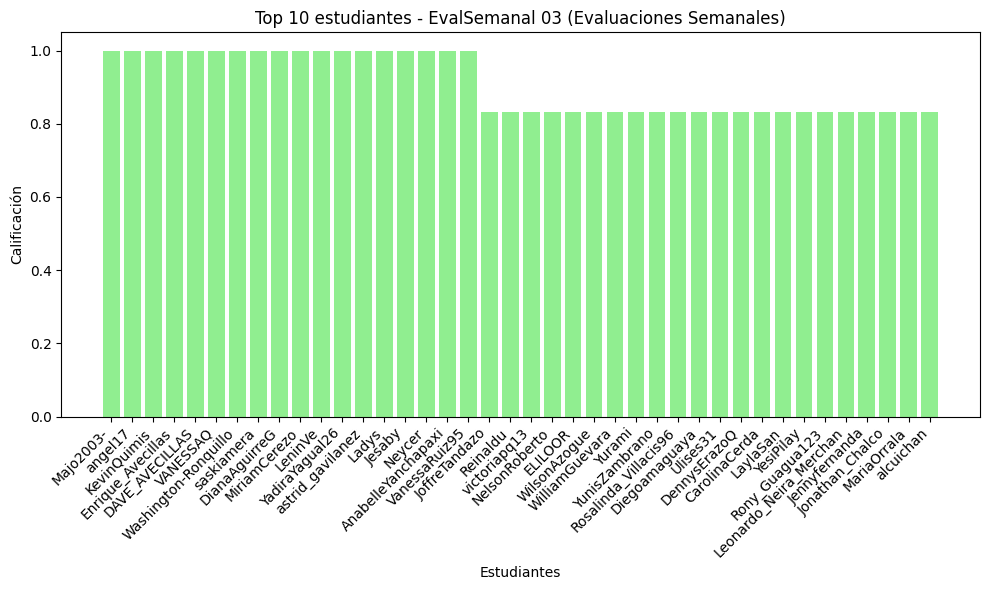

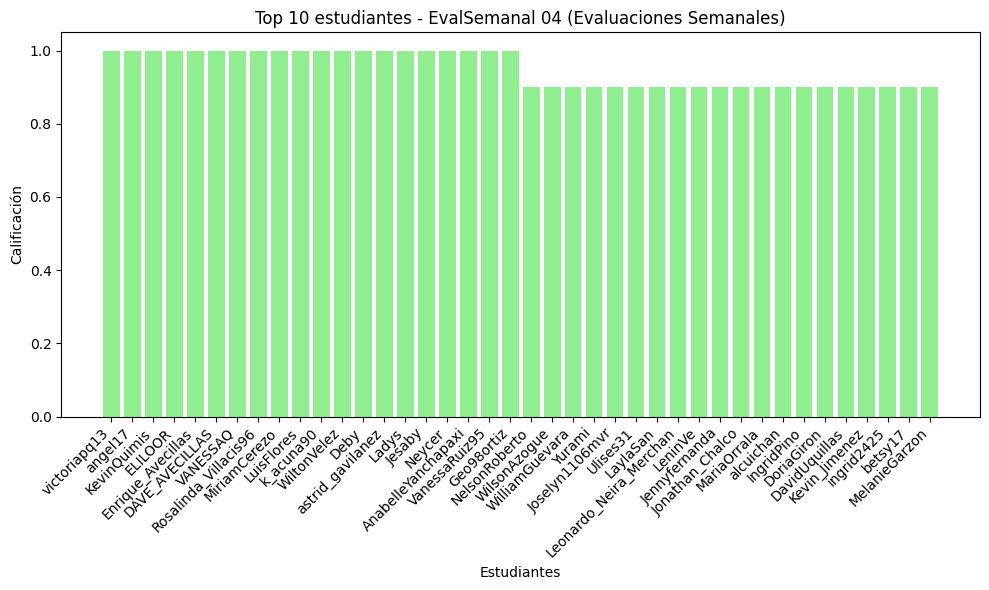

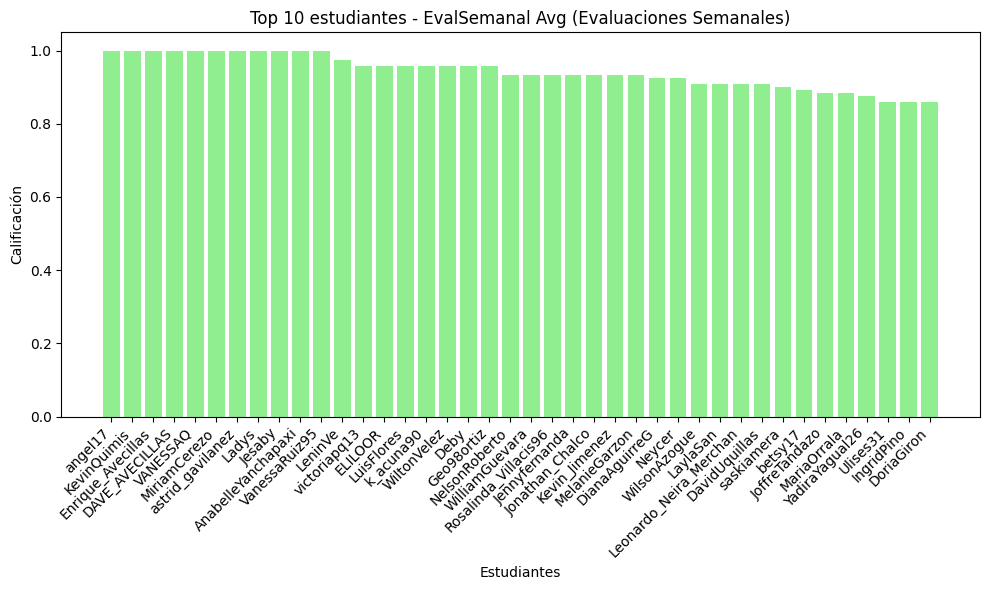

In [16]:
ruta_archivo_csv = "C:\\Users\\nahom\\OneDrive - Universidad Técnica Particular de Loja - UTPL\\Curso Documentos Accesibles\\CSV\\analisis-codigo\\reportes csv\\UTPL_CREAA1_2024_2_grade_report_2024-12-02-1435.csv"

top_estudiantes_por_evaluacion(ruta_archivo_csv)

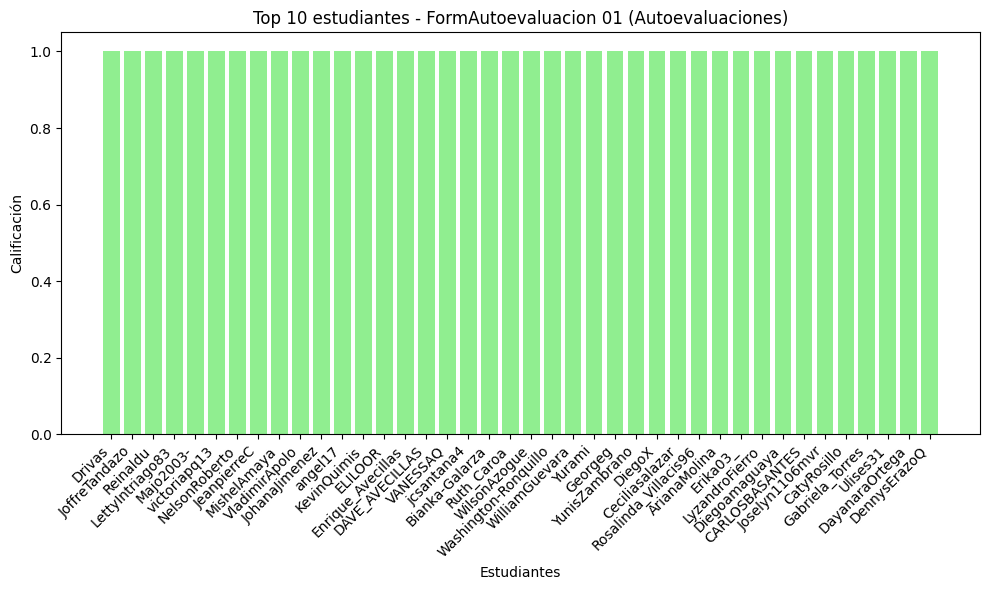

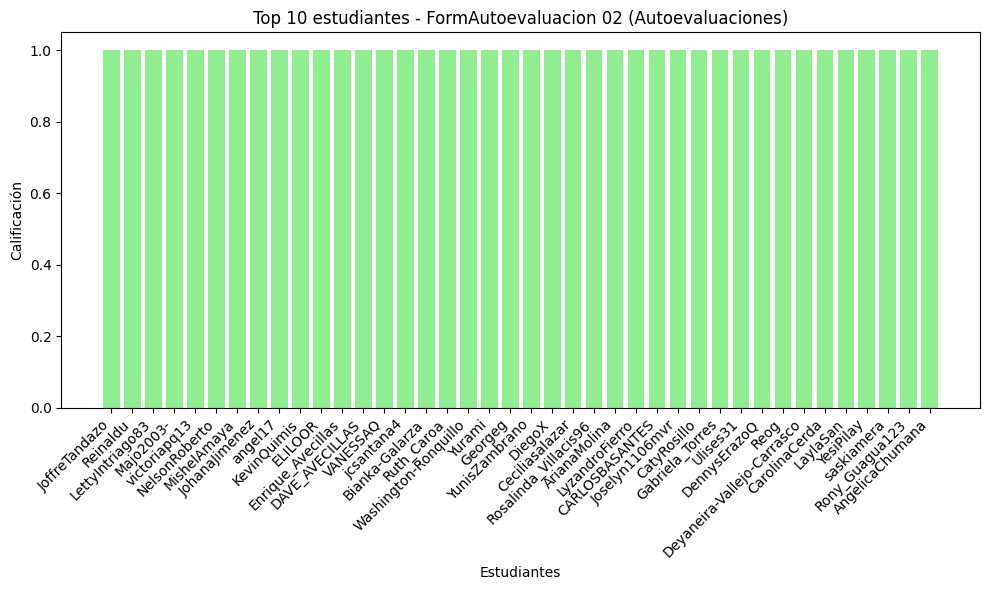

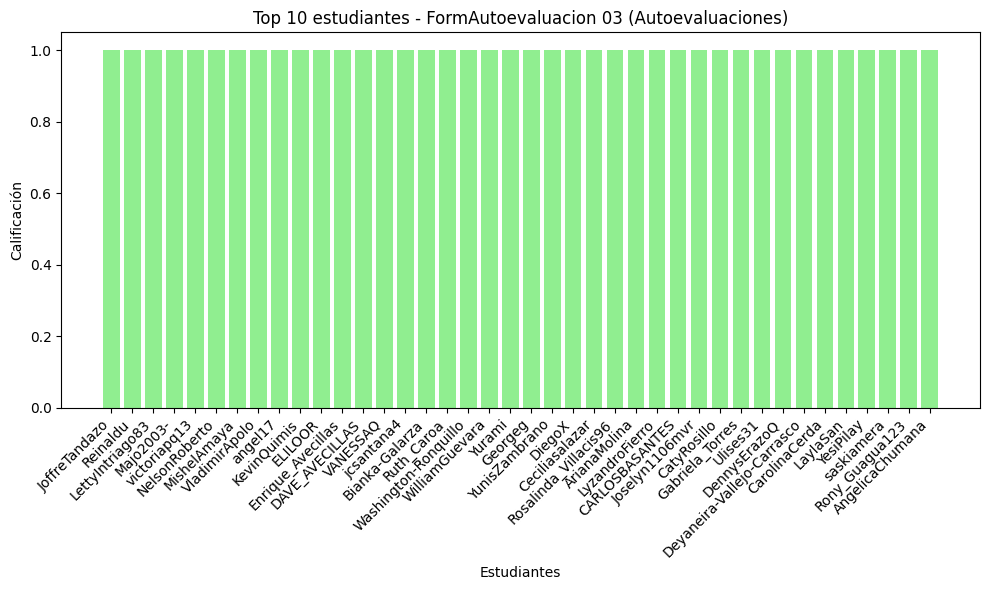

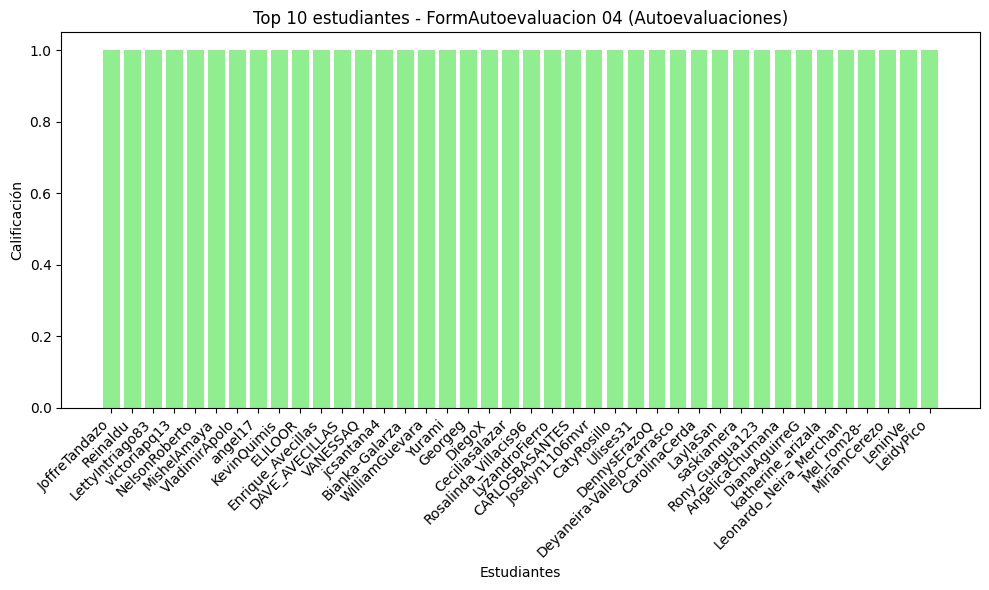

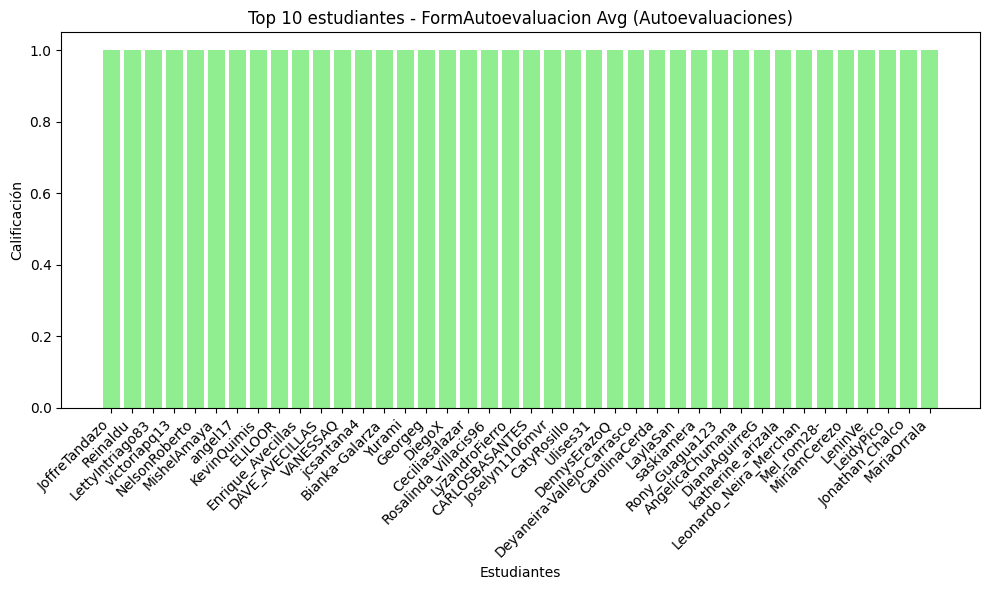

In [17]:
top_estudiantes_por_autoevaluacion(ruta_archivo_csv)

In [23]:
def top_usuarios_por_evento_promedio(ruta_archivo_json, ruta_archivo_csv, evento_objetivo, top_n=40):
    """
    Muestra los usuarios que más veces aparecen en un evento específico (e.g., 'play_video'),
    mostrando su promedio de evaluación semanal con dos decimales y generando un gráfico de barras.
    
    :param ruta_archivo_json: Ruta del archivo JSONL que contiene los datos del evento.
    :param ruta_archivo_csv: Ruta del archivo CSV que contiene los promedios.
    :param evento_objetivo: Nombre del evento objetivo (e.g., 'play_video').
    :param top_n: Número de usuarios a mostrar en el ranking (por defecto 40).
    """
    conteo_usuarios = Counter()

    try:
        # Leer el archivo JSONL
        with open(ruta_archivo_json, 'r', encoding='utf-8') as archivo:
            for linea in archivo:
                if linea.strip():  # Ignorar líneas vacías
                    try:
                        objeto = json.loads(linea.strip())  # Cargar cada línea como JSON
                        evento = objeto.get('event_type', '')  # Obtener el tipo de evento
                        usuario = objeto.get('username', '')  # Obtener el nombre del usuario
                        
                        if evento == evento_objetivo and usuario:  # Verificar coincidencia y usuario válido
                            conteo_usuarios[usuario] += 1
                    except json.JSONDecodeError as e:
                        print(f"Error al decodificar línea: {e}")

        # Leer el archivo CSV y crear un diccionario de promedios
        df_promedios = pd.read_csv(ruta_archivo_csv, usecols=['username', 'EvalSemanal Avg'])
        promedios_dict = dict(zip(df_promedios['username'], df_promedios['EvalSemanal Avg'].round(2)))

        # Obtener los usuarios más frecuentes
        top_usuarios = conteo_usuarios.most_common(top_n)

        # Mostrar resultados en texto
        print(f"Top {top_n} usuarios con más eventos '{evento_objetivo}':\n")
        usuarios_formateados = []
        for i, (usuario, conteo) in enumerate(top_usuarios, start=1):
            promedio = promedios_dict.get(usuario, "N/A")
            usuario_formateado = f"{usuario} ({promedio:.2f})" if promedio != "N/A" else f"{usuario} (N/A)"
            usuarios_formateados.append(usuario_formateado)
            print(f"{i}. {usuario_formateado}: {conteo} veces")

        # Generar gráfico de barras
        if top_usuarios:
            conteos = [conteo for _, conteo in top_usuarios]
            plt.figure(figsize=(10, 6))
            plt.bar(usuarios_formateados, conteos, color='skyblue')
            plt.xlabel('Usuarios (Promedio)')
            plt.ylabel('Cantidad de eventos')
            plt.title(f'Top {top_n} usuarios con más eventos "{evento_objetivo}"')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        
    except Exception as e:
        print(f"Error general: {e}")


Top 40 usuarios con más eventos 'play_video':

1. JeanpierreC (0.00): 437 veces
2. mlcambar (0.67): 405 veces
3. Majo2003- (0.70): 281 veces
4. betsy17 (0.89): 115 veces
5. Ruth_Caroa (0.58): 115 veces
6. JanethUrrego (0.50): 110 veces
7. JoffreTandazo (0.88): 80 veces
8. Rodi (0.50): 76 veces
9. k_acuna90 (0.96): 74 veces
10. Erika03_ (0.50): 60 veces
11. GenesisGuerrero15 (0.75): 52 veces
12. LuisFlores (0.96): 39 veces
13. geomaramacias (0.50): 36 veces
14. Ulises31 (0.86): 36 veces
15. OmarSalazar (0.42): 35 veces
16. Sandra-gre2024 (0.00): 32 veces
17. Miryan_P30 (0.00): 30 veces
18. mendara (0.25): 24 veces
19. CatalinaMite (0.00): 23 veces
20. WilsonAzogue (0.91): 22 veces
21. DCastro (0.15): 21 veces
22. AdrianaFlores (0.22): 20 veces
23. ArianaMolina (0.80): 20 veces
24. WilliamGuevara (0.93): 19 veces
25. MishelAmaya (0.50): 17 veces
26. EvelynCM (0.00): 15 veces
27. CarolinaZh (0.25): 12 veces
28. DennysErazoQ (0.66): 11 veces
29. Neycer (0.92): 10 veces
30. JohanaJimenez (0

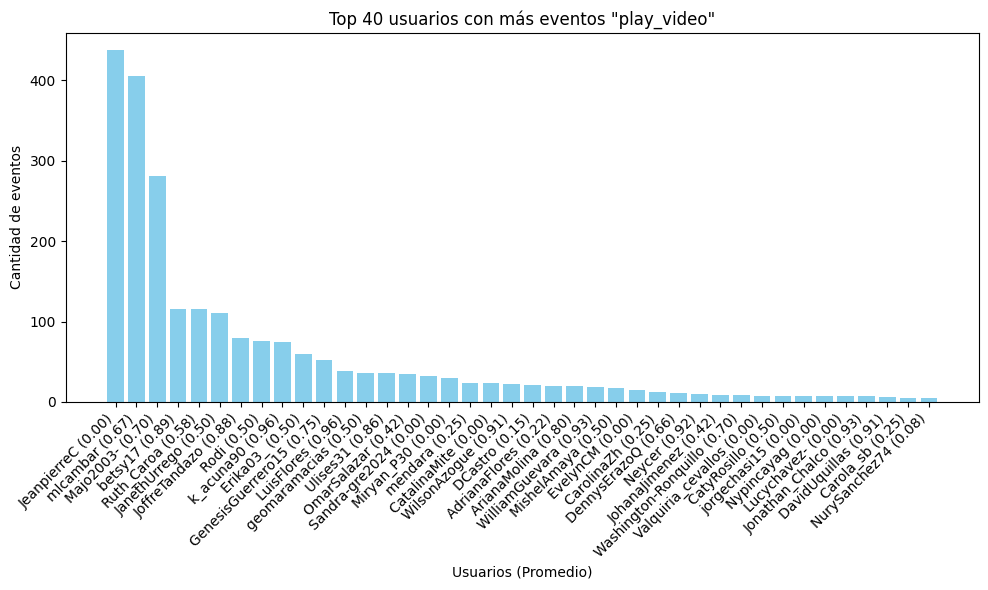

In [24]:
top_usuarios_por_evento_promedio(ruta_archivo_json, ruta_archivo_csv, evento_objetivo='play_video')

In [25]:
def videos_reproducidos_por_usuario(ruta_archivo_json, ruta_archivo_csv, evento_objetivo='play_video', top_n=40):
    """
    Muestra los usuarios que más videos únicos han reproducido en un evento específico,
    mostrando su promedio de evaluación semanal con dos decimales y generando un gráfico de barras.

    :param ruta_archivo_json: Ruta del archivo JSONL que contiene los datos del evento.
    :param ruta_archivo_csv: Ruta del archivo CSV que contiene los promedios.
    :param evento_objetivo: Nombre del evento objetivo (por defecto 'play_video').
    :param top_n: Número de usuarios a mostrar en el ranking (por defecto 40).
    """
    videos_por_usuario = {}

    try:
        # Leer el archivo JSONL
        with open(ruta_archivo_json, 'r', encoding='utf-8') as archivo:
            for linea in archivo:
                if linea.strip():  # Ignorar líneas vacías
                    try:
                        objeto = json.loads(linea.strip())  # Cargar cada línea como JSON
                        evento = objeto.get('event_type', '')  # Obtener el tipo de evento
                        usuario = objeto.get('username', '')  # Obtener el nombre del usuario
                        video_id = json.loads(objeto.get('event', '{}')).get('code', '')

                        if evento == evento_objetivo and usuario and video_id:
                            if usuario not in videos_por_usuario:
                                videos_por_usuario[usuario] = set()
                            videos_por_usuario[usuario].add(video_id)
                    except json.JSONDecodeError as e:
                        print(f"Error al decodificar línea: {e}")

        # Leer el archivo CSV y crear un diccionario de promedios
        df_promedios = pd.read_csv(ruta_archivo_csv, usecols=['username', 'EvalSemanal Avg'])
        promedios_dict = dict(zip(df_promedios['username'], df_promedios['EvalSemanal Avg'].round(2)))

        # Calcular el número de videos únicos reproducidos por cada usuario
        usuarios_conteo = [(usuario, len(videos)) for usuario, videos in videos_por_usuario.items()]
        top_usuarios = sorted(usuarios_conteo, key=lambda x: x[1], reverse=True)[:top_n]

        # Mostrar resultados en texto
        print(f"Top {top_n} usuarios con más videos únicos reproducidos '{evento_objetivo}':\n")
        usuarios_formateados = []
        for i, (usuario, conteo) in enumerate(top_usuarios, start=1):
            promedio = promedios_dict.get(usuario, "N/A")
            usuario_formateado = f"{usuario} ({promedio:.2f})" if promedio != "N/A" else f"{usuario} (N/A)"
            usuarios_formateados.append(usuario_formateado)
            print(f"{i}. {usuario_formateado}: {conteo} videos únicos")

        # Generar gráfico de barras
        if top_usuarios:
            conteos = [conteo for _, conteo in top_usuarios]
            plt.figure(figsize=(10, 6))
            plt.bar(usuarios_formateados, conteos, color='skyblue')
            plt.xlabel('Usuarios (Promedio)', fontsize=12)
            plt.ylabel('Cantidad de videos únicos reproducidos', fontsize=12)
            plt.title(f'Top {top_n} usuarios con más videos únicos reproducidos')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()

    except Exception as e:
        print(f"Error general: {e}")

Top 40 usuarios con más videos únicos reproducidos 'play_video':

1. Majo2003- (0.70): 29 videos únicos
2. LuisFlores (0.96): 28 videos únicos
3. GenesisGuerrero15 (0.75): 27 videos únicos
4. k_acuna90 (0.96): 19 videos únicos
5. mendara (0.25): 18 videos únicos
6. mlcambar (0.67): 18 videos únicos
7. JeanpierreC (0.00): 18 videos únicos
8. WilliamGuevara (0.93): 18 videos únicos
9. DCastro (0.15): 18 videos únicos
10. AdrianaFlores (0.22): 17 videos únicos
11. ArianaMolina (0.80): 17 videos únicos
12. betsy17 (0.89): 15 videos únicos
13. Ulises31 (0.86): 12 videos únicos
14. Erika03_ (0.50): 11 videos únicos
15. Rodi (0.50): 11 videos únicos
16. JoffreTandazo (0.88): 10 videos únicos
17. WilsonAzogue (0.91): 9 videos únicos
18. geomaramacias (0.50): 9 videos únicos
19. CatalinaMite (0.00): 8 videos únicos
20. Valquiria_cevallos (0.00): 7 videos únicos
21. Ruth_Caroa (0.58): 7 videos únicos
22. jorgechasi15 (0.00): 6 videos únicos
23. Washington-Ronquillo (0.70): 6 videos únicos
24. Ne

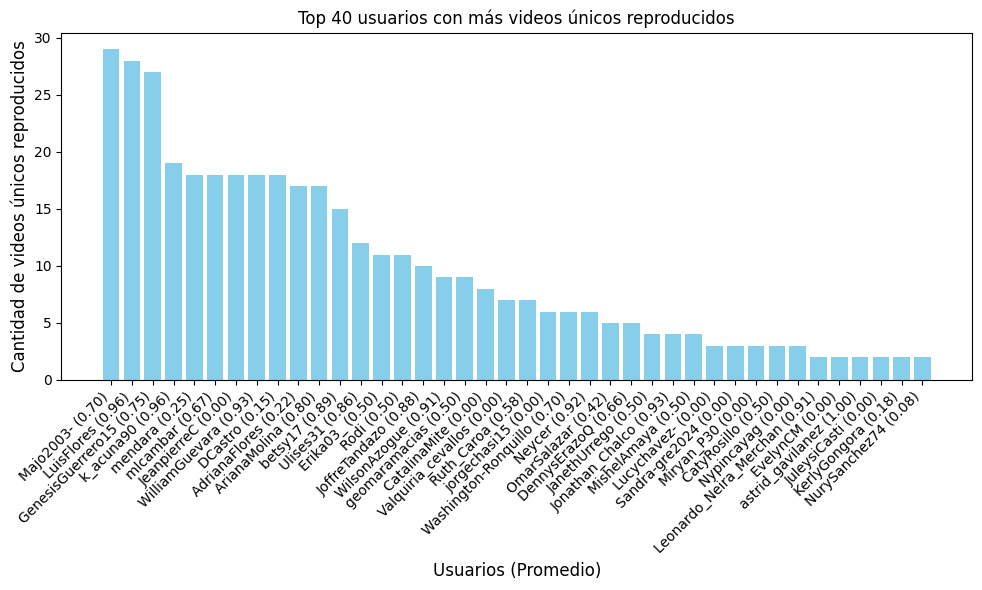

In [26]:
videos_reproducidos_por_usuario(ruta_archivo_json, ruta_archivo_csv)

In [27]:
def graficar_dispercion_videos_promedio(ruta_archivo_json, ruta_archivo_csv):
    """
    Dibuja un gráfico de dispersión que muestra la relación entre el número de videos únicos reproducidos
    y el promedio de evaluación semanal de los usuarios.

    :param ruta_archivo_json: Ruta del archivo JSONL que contiene los eventos.
    :param ruta_archivo_csv: Ruta del archivo CSV que contiene los promedios de evaluación.
    """
    try:
        # Cargar datos desde el archivo JSONL
        videos_por_usuario = {}
        with open(ruta_archivo_json, 'r', encoding='utf-8') as archivo:
            for linea in archivo:
                if linea.strip():
                    try:
                        objeto = json.loads(linea.strip())
                        if objeto.get('event_type') == 'play_video':
                            usuario = objeto.get('username')
                            codigo_video = json.loads(objeto.get('event', '{}')).get('code')
                            if usuario and codigo_video:
                                if usuario not in videos_por_usuario:
                                    videos_por_usuario[usuario] = set()
                                videos_por_usuario[usuario].add(codigo_video)
                    except json.JSONDecodeError as e:
                        print(f"Error al decodificar línea: {e}")

        # Cargar promedios desde el archivo CSV
        df_promedios = pd.read_csv(ruta_archivo_csv, usecols=['username', 'EvalSemanal Avg'])
        promedios_dict = dict(zip(df_promedios['username'], df_promedios['EvalSemanal Avg'].round(2)))

        # Preparar datos para el gráfico
        x_videos = []
        y_promedios = []

        for usuario, videos in videos_por_usuario.items():
            promedio = promedios_dict.get(usuario)
            if promedio is not None:
                x_videos.append(len(videos))
                y_promedios.append(promedio)

        # Crear el gráfico de dispersión
        plt.figure(figsize=(10, 6))
        plt.scatter(x_videos, y_promedios, color='skyblue', edgecolor='k')
        plt.xlabel('Número de Videos Únicos Reproducidos', fontsize=12)
        plt.ylabel('Promedio de Evaluación Semanal', fontsize=12)
        plt.title('Relación entre Videos Únicos Reproducidos y Promedio de Evaluación', fontsize=14)
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.xticks(range(1, 30, 2))  # Ajustar según el rango esperado
        plt.yticks([i / 10 for i in range(11)])  # Promedio de 0.0 a 1.0
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error al generar el gráfico: {e}")

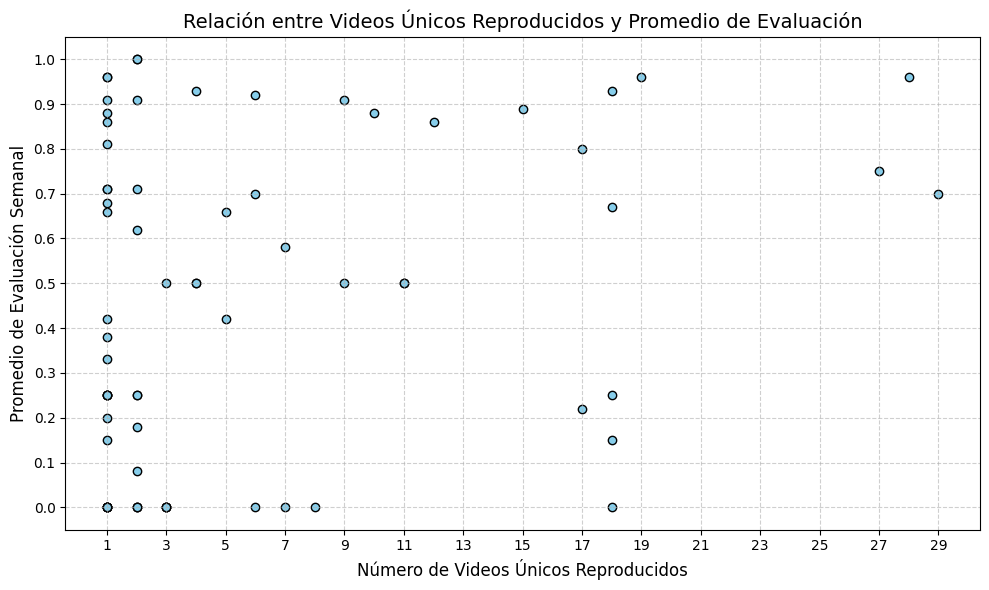

In [28]:
graficar_dispercion_videos_promedio(ruta_archivo_json, ruta_archivo_csv)